In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Problem 2: Predicting whether an order should be sent to a technical approver

In this problem, you'll build a Machine Learning model that makes decisions about whether to send an order to a technical approver or not.
This problem is based on Chapter 2 of [*Machine Learning for Business*](https://www.manning.com/books/machine-learning-for-business).

<img src="ML for business.png" alt="Drawing" style="width: 150px;"/>

You work in the purchasing department of a company. 
Your job is to receive requisitions from staff to buy a product or service.
For some products, such as computers, you need to send the request to a technical advisor.
Hence, when an order comes in, you need to decide whether to send it straight to the requester's financial approver or whether you should send it to a technical approver first.

![im](im1.png)

In [3]:
# load data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/orders_with_predicted_value.csv'
orders = pd.read_csv(url)
orders.head(5) 

,tech_approval_required,requester_id,role,product,quantity,price,total
0,0,E2300,tech,Desk,1,664,664
1,0,E2300,tech,Keyboard,9,649,5841
2,0,E2374,non-tech,Keyboard,1,821,821
3,1,E2374,non-tech,Desktop Computer,24,655,15720
4,0,E2327,non-tech,Desk,1,758,758


The dataset consistis of 1000 historical orders, and a flag that indicates whether that order was sent to a technical approver or not (the `tech_approval_required`).

In [4]:
orders.tech_approval_required.value_counts()

0    807
1    193
Name: tech_approval_required, dtype: int64

Your end goal is to be able to submit an order to a Machine Learning model and have it return a result that recommends sending the order to a technical approver or not.

**Part 1:** Define the feature matrix X and the target vector y from the `orders` dataframe,  and then split X and y into training and testing sets.

In [17]:
# your code here
# Note there are 98 unique requester_id values. Probably okay to put it in X
X = orders[['requester_id', 'role', 'product', 'quantity', 'price', 'total']]
y = orders.tech_approval_required

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

**Part 3:** build a classification pipeline (feature preprocessor + Classification Tree)

In [13]:
# your code here
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

num_features = ['quantity', 'price', 'total']
num_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

cat_features = ['requester_id', 'role', 'product']
cat_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')) # onehot encoder can take: handle_unknwon='ignore'
])

feature_processor = ColumnTransformer(transformers=[
    ('num_processor', num_processor, num_features),
    ('cat_processor', cat_processor, cat_features)
])

pipe = Pipeline(steps=[
    ('feature_processor', feature_processor),
    ('forest', DecisionTreeClassifier(max_depth=5))
])

**Part 4:** Use `GridSearchCV` to find a good `max_depth` value.

In [14]:
# your code here
from sklearn.model_selection import GridSearchCV
depth_list = [2,4,8,16]
param_dic = {'forest__max_depth': depth_list}

grid = GridSearchCV(pipe,param_dic, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid.fit(X,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('feature_processor',
                                        ColumnTransformer(transformers=[('num_processor',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['quantity',
                                                                          'price',
                                                                          'total']),
                                                                        ('cat_processor',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['requester_id',
                                                                          'role',
                                                                          'product'])])),
                                       ('forest',
                                        DecisionTreeClassifier(max_depth=5))]),
             n_jobs=-1, param_grid={'forest__max_depth': [2, 4, 8, 16]},
             scoring='accuracy', verbose=1)

**Part 5:**  Evaluate the performance of your classification pipeline on the test set

In [22]:
# your code here
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
best_pipe = grid.best_estimator_
y_test_pred = best_pipe.predict(X_test)


def TestPipe(y,y_pred):
    print('params:',grid.best_params_)
    # MSE
    print('MSE:',np.sqrt(mean_squared_error(y,y_pred)))
    # MAE
    print('MAE:',mean_absolute_error(y,y_pred))

TestPipe(y_test,y_test_pred)

params: {'forest__max_depth': 4}
MSE: 0.0
MAE: 0.0


In [41]:
X_train.columns

Index(['requester_id', 'role', 'product', 'quantity', 'price', 'total'], dtype='object')

**Part 6:** Use the `plot_tree` function to visualize the pipeline classification tree.

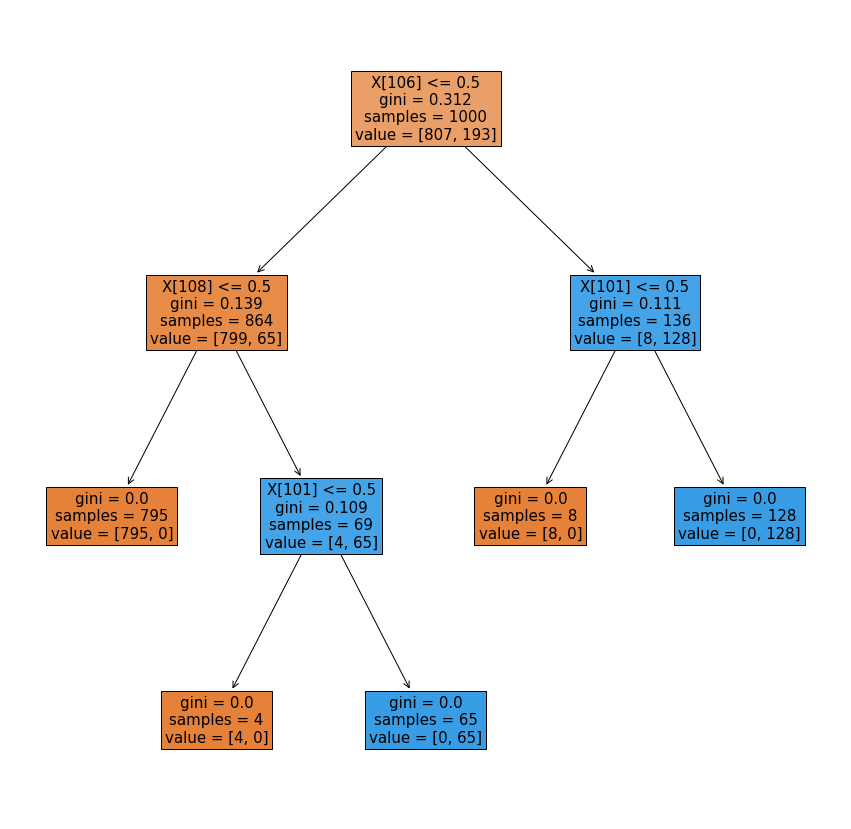

In [48]:
# your code here
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
plot_tree(best_pipe.named_steps['forest'],
         #feature_names = X_test.columns,
         #class_names = best_pipe.named_steps['forest'].classes_,
         filled = True,
         fontsize=15)
plt.show()

**Part 7:** Describe with words how the classification tree makes predictions.

Had trouble showing features and class names in the tree due to some index error. 